# Week 2: Classification Models for the Iris Dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
#Load as X and y data
X, y = load_iris(return_X_y=True )

In [4]:
# or load into a dataframe
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df = pd.DataFrame(X,columns = ["SepalLengthCm", "SepalWidthCm", 
                               "PetalLengthCm", "PetalWidthCm"])

In [7]:
df["Species"] = y.tolist()

In [8]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Exploratory Data Analysis

(Text(0.5, 0, 'Sepal Length (cm)'), Text(0, 0.5, 'Petal Length (cm)'))

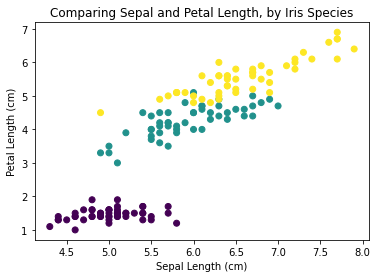

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df["SepalLengthCm"], df["PetalLengthCm"], c = df["Species"], label=df["Species"])
plt.title("Comparing Sepal and Petal Length, by Iris Species")
plt.xlabel("Sepal Length (cm)"), plt.ylabel("Petal Length (cm)")

Text(0.5, 1.0, 'Sepal Length vs Petal Width')

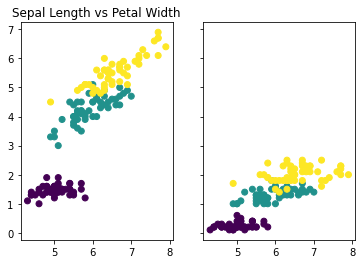

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(df["SepalLengthCm"], df["PetalLengthCm"], c = df["Species"])
ax1.set_title('Sepal Length vs Petal Length')

ax2.scatter(df["SepalLengthCm"], df["PetalWidthCm"], c = df["Species"])
ax1.set_title('Sepal Length vs Petal Width')

In [11]:
df["Species"].unique()

array([0, 1, 2], dtype=int64)

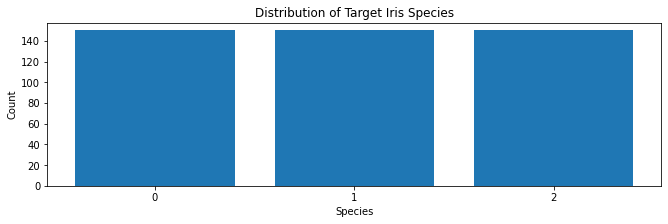

In [49]:
import numpy as np
plt.figure(figsize=(11,3))
plt.bar(height = df["Species"].count(), x = [0, 1, 2] )

plt.xticks((0, 1, 2))
plt.title("Distribution of Target Iris Species")
plt.xlabel("Species"), plt.ylabel("Count")
plt.show()

It is good practice to review the distribution of the labels. A balanced data set (where there is approximately the same number of each class) is idealfor machine learning. Inbalanced data sets can be handled with further 
preprocessing or seeking additional data.


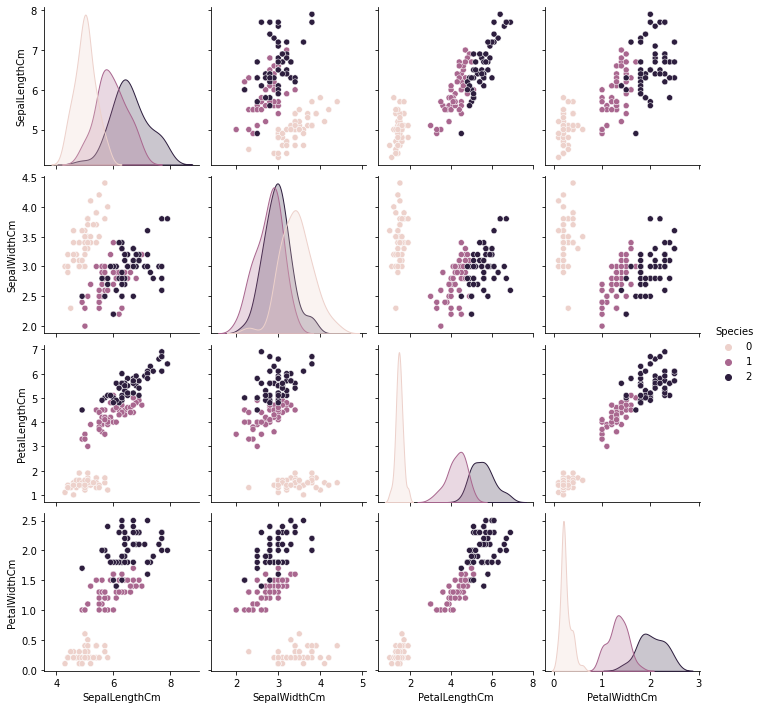

In [13]:
import seaborn as sn

# Pair plots allow us to quickly view the relationship between all features
sn.pairplot(df, hue="Species")

## Create training and testing sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression(solver = 'lbfgs', 
                           multi_class='multinomial',
                           max_iter=1000).fit(X_train,y_train)

In [17]:
y_pred = model.predict(X_test)
    
from sklearn.metrics import precision_score
print('precision score: '+ str(precision_score(y_test, y_pred, 
                                               average='weighted')))

precision score: 0.98125


In [18]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2])

In [19]:
model

LogisticRegression(max_iter=1000, multi_class='multinomial')

## K-Nearest Neighbors Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier 
# Choose value of K 
K = 3
model = KNeighborsClassifier(n_neighbors= 10)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [21]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2])

In [22]:
score = model.score(X_test,y_test)
print(score)

0.98


In [23]:
#Optimize number of neighbours by testing different values

for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors= i)
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    print(score)

0.96
0.96
0.96
0.96
0.98
0.98
0.98
0.98
0.98


In [24]:
model_best_knn = KNeighborsClassifier(n_neighbors= 5)
model_best_knn.fit(X_train, y_train)
score_best = model_best_knn.score(X_test,y_test)
print(score_best)

0.98


## Support Vector Machines (SVM)

In [25]:
# Access the module in skleanr to do the SVM analysis (must be capitalized, its a class)
from sklearn.svm import SVC

In [26]:
# Create an instance of 'svm_model'
svm_model = SVC(max_iter = 1000) # Not required, but can prevent crashing when models don't converge

In [27]:
# Training and fitting the model now
svm_model.fit(X_train, y_train) 

SVC(max_iter=1000)

In [28]:
# Guess what, time to do the predictions!
predictions = svm_model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Optimize a SVC Model using GridSearch

In [30]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001]}#,
#              'kernel': ['rbf']} 

In [31]:
# We need to import GridSearchCV from model_selection. ** Must be capitalized in GridSearchCV! **
from sklearn.model_selection import GridSearchCV

In [32]:
#shift+tab for doc string
grid = GridSearchCV(SVC(), param_grid, verbose=2) #refit = True by default
#grid is an instance of the gridsearch. 

In [33]:
# Run a model and save the results for each combination of variables in the grid
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [34]:
print('The best parameters are %s with a score of %0.2f' 
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10, 'gamma': 0.1} with a score of 0.98


In [35]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [36]:
#Now we have everything in grid, including the best one, so we can just use that:
grid_predictions = grid.predict(X_test)

In [37]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
model_tree = DecisionTreeClassifier(criterion = "entropy", 
                                    max_leaf_nodes = 1000)

In [40]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=1000)

In [41]:
y_pred_tree = model_tree.predict(X_test)

In [42]:
print(confusion_matrix(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_tree))

[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



## Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model_RF = RandomForestClassifier(n_estimators = 100, # Default is 100
                                  bootstrap = True) # If false, then all features will be used in each tree ("bagging")
                                                    # class_weight allows you to add weighting ("boosting")   

In [45]:
model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
y_pred_RF = model_RF.predict(X_test)

In [47]:
print(confusion_matrix(y_test,      y_pred_RF))
print(classification_report(y_test, y_pred_RF))

[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



To finish, compare your models and choose the model with the highest accuracy!